<a href="https://colab.research.google.com/github/Viktor140783/Pithon-Project/blob/main/%22Sales_Analysis_of_a_Global_Company_Insights_for_Growth%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У датасеті міститься інформація щодо продажів продукції компанії, яка працює на світовому ринку і продає товари у звичайних магазинах та інтернет-магазинах. Датасет складається з трьох таблиць:

events.csv — продажі за декілька років;  
products.csv — категорії товарів та їх коди;  
countries.csv — країни, регіони та їх коди.  
Основна мета — очищення даних та проведення їх аналізу; знаходження цінних інсайтів діяльності компанії.

# Етапи проєкту:

## Data overview. Розуміння даних та їх змісту.
*   Завантажуємо датасет, розбераємося зі змістом колонок, робимо їх опис.
*   Виявляємо ключові поля, що поєднують три таблиці.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Підключаємося до google drive
from google.colab import drive
drive.mount('/content/drive')

# Вибираємо робочу папку з нашими файлами
%cd /content/drive/MyDrive/ColabFolder/FinalProject/

#Завнтажуємо Countries
df_countries = pd.read_csv('countries.csv')
print(f"\nКраїни та регіони")
print(df_countries.head())

#Завнтажуємо events
df_events = pd.read_csv('events.csv')
print(f"\nПродажі")
print(df_events.head())

#Завнтажуємо products
df_products = pd.read_csv('products.csv')
print(f"\nТовари")
print(df_products.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/ColabFolder/FinalProject

Країни та регіони
             name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia

Продажі
    Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012     

Маємо 3 датасети:
Країни, Продажі, Товари

Країни містять такі стовбчики:            
*   name - назва країни
*   alpha-2 - двохлітерний код країни зг. ISO 3166-1
*   alpha-3 - трьохлітерний код країни зг. ISO 3166-1
*   region - регіон, де знаходиться країна
*   sub-region - субрегіон або частина регіону де знаходиться країна.  

Продажі:        
*   Order ID - номер замовлення
*   Order Date - дата замовлення
*   Ship Date - дата реалізації
*   Order Priority - пріоритет замовлення
*   Country Code - alpha-3 - трьохлітерний код країни зг. ISO 3166-1
*   Product ID - унікальний ID продукту(товару)
*   Sales Channel - канал продажу (Online, Offline)
*   Units Sold - кількість проданих одиниць товару
*   Unit Price - ціна товару
*   Unit Cost - вартість товару

Товари:
*   ID - унікальний ID продукту(товару)
*   item_type - категорія товару

Ці датасети ми можемо поєднати за:
- countries.alpha 3 <=> events.Country Code
- events.Product ID <=> products.ID










## Data cleaning. Робота із пропущеними даними, некоректними даними, аномаліями.

- Перевіряємо, чи є пропущені значення у кожній таблиці, оцінюємо їх долю, спробуємо зрозуміти причини їх виникнення.
- Заповняємо або видаляємо пропущені значення, обґрунтувавши свою думку.
- Перевіряємо, чи всі типи даних розпізнаються коректно. Якщо є розбіжності, потрібно виявити та усунути причини, за потреби, зробити перетворення типів у колонках.
- Досліджуємо дані на наявність дублікатів. Зверни увагу, що дублікати можуть траплятися через зайві пробіли (або інші символи) у комірках, розбіжність у великих/малих літерах, схожість літер у кирилиці/латиниці тощо. За потреби, зроби перетворення для усунення дублікатів.
- Досліджуємо дані на наявність аномалій. Якщо є, спробуємо зрозуміти причини.

In [ ]:
# Перевіряєм пропущені значення в кожному стовбчику кожного датасету
print(df_countries.isna().sum())
print(df_events.isna().sum())
print(df_products.isna().sum())

# Підрахуємо долю пропущених значень
print(df_countries.isna().sum() / df_countries.shape[0]*100)
print(df_events.isna().sum() / df_events.shape[0]*100)
print(df_products.isna().sum() / df_products.shape[0]*100)

# Виведемо рядки з пропущенними значеннями
print(df_countries[df_countries.isna().any(axis=1)])
print(df_events[df_events.isna().any(axis=1)])
print(df_products[df_products.isna().any(axis=1)])

# Видалення рядків з пропущенними значеннями
df_countries = df_countries.dropna()
print(df_countries.isna().sum())
df_events = df_events.dropna()
print(df_events.isna().sum())

# Аналізуємо типи даних
print(df_countries.dtypes)
print(df_events.dtypes)
print(df_products.dtypes)

# Змінюю тип даних Order Date Ship Date
df_events['Order Date'] = pd.to_datetime(df_events['Order Date'], errors='coerce')
df_events['Ship Date'] = pd.to_datetime(df_events['Ship Date'], errors='coerce')

print(df_events.dtypes)

# Перевіряємо датасети на наявність дублікатів
print(f'Дублікати')
print(df_countries.duplicated().sum())
print(df_events.duplicated().sum())
print(df_products.duplicated().sum())

# Виводими статистику по датасету events
print(df_events.describe())



name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64
id           0
item_type    0
dtype: int64
name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64
id           0.0
item_type    0.0
dtype: float64
           name alpha-2 alpha-3  region          sub-region
8    Antarctica      AQ     ATA     NaN                 NaN
153     Namibia     NaN     NAM  Africa  Sub-Saharan Afri

<ipython-input-9-650e6e7f9653>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events['Order Date'] = pd.to_datetime(df_events['Order Date'], errors='coerce')
<ipython-input-9-650e6e7f9653>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events['Ship Date'] = pd.to_datetime(df_events['Ship Date'], errors='coerce')


В датасеті countries маємо 2 пропущених значення, які стосуються Antarctica та Namibia, доля цих пропусків мала та значення не значне, тому я їх видаляю.  
В датасеті events є пропуски в колонці Country Code, це колонка по якій ми будемо приєднувати іншу колонку, пусті значення по країнах не дадуть повних даних в подальшій аналітиці, що може призвести до необ'єктивності аналізу, тому я їх видаляю.   
Також в цьому ж датасеті є пропуски в Units Sold - 0,15%, доля досить мала, що не вплине на подальшу аналітику, тому я їх теж видаляю.  
Датасет products не має пропущених даних.  
Колонки Order Date та Ship Date мають тип даних object, для подальшого аналізу зміню тип на DateTime.  
Дублікатів не виявлено.  
Аномалій не виявлено.


## Data analysis and visualization. Аналіз та візуалізація даних, знаходження цінних інсайтів.

- Проводимо з’єднання трьох таблиць в один датафрейм. Видаляємо непотрібні для аналізу колонки. За потреби, перейменовуємо колонки.

- Розпочинаємо з ключових метрик діяльності компанії: загальна кількість замовлень, загальний прибуток, загальна кількість охоплених країн тощо (придумай інші метрики).

- Проаналізуємо продажі (доходи, витрати, прибутки, популярність товарів) та зробимо відповідні візуалізації в розрізі:
  1.   категорій товарів;
  2.   географії (країн, регіонів);  
  1.   каналів продажу (онлайн або офлайн).  

- Проаналізуй інтервал часу між замовленням та його відвантаженням та зроби відповідні візуалізації в розрізі:
  1.   категорій товарів;
  1.   країн;  
  2.   регіонів

- Проаналізуємо, чи залежить прибуток від часу, необхідного на відвантаження товару. Зробимо потрібні для цього агрегування та візуалізації.

- Проаналізуємо за допомогою візуалізації динаміку продажів (у часі) у розрізі категорій товарів, країн, регіонів, визначимо основні тенденції.

- Проведемо аналіз продажів товарів за днями тижня. Чи можна деякі товари вважати сезонними?



In [ ]:
# З'єднуємо датасети countries, events та products
join_df = pd.merge(df_countries, df_events, left_on='alpha-3', right_on='Country Code')
df = pd.merge(join_df, df_products, left_on='Product ID', right_on='id')
df.rename(columns={"item_type": "categories"}, inplace=True)
# Зробимо назви колонок в стилі SnakeCase
df.columns = df.columns.str.lower().str.replace(r"[ -]", "_", regex=True)

# Для подальшого аналізу доречно створити підсумовуючі стовбці
df['total_price'] = df['unit_price'] * df['units_sold']
df['total_cost'] = df['unit_cost'] * df['units_sold']
df['total_profit'] = df['total_price'] - df['total_cost']
df['time_interval'] = df['ship_date'] - df['order_date']
df['time_interval'] = pd.to_timedelta(df['time_interval'])
df["year"] = df["order_date"].dt.strftime("%Y")
df["year_month"] = df["order_date"].dt.strftime("%Y-%m")


print(df.head())
print(df.info())

# Ключові метрики компанії

total_orders = df["order_id"].nunique() # Загальна кількість замовлень (Total Orders)
print(f"Кількість замовлень: {total_orders}")
# Загальний прибуток
total_sales = df["unit_price"].sum() * df["units_sold"].sum() # Загальний прибуток (Total Sales)
print(f"Загальний прибуток: {total_sales}")
# Загальний дохід
total_profit = total_sales - (df["unit_cost"].sum() * df["units_sold"].sum()) # Загальний дохід (Total Profit)
print(f"Загальний дохід: {total_profit}")
# Загальна кількість охоплених країн
total_countries = df["name"].nunique() # Загальна кількість охоплених країн (Total Countries)
print(f"Кількість країн: {total_countries}")


      name alpha_2 alpha_3  region       sub_region   order_id order_date  \
0  Albania      AL     ALB  Europe  Southern Europe  152191388 2012-05-18   
1  Albania      AL     ALB  Europe  Southern Europe  208238399 2015-08-29   
2  Albania      AL     ALB  Europe  Southern Europe  246922719 2015-07-13   
3  Albania      AL     ALB  Europe  Southern Europe  270358788 2014-12-11   
4  Albania      AL     ALB  Europe  Southern Europe  357930982 2016-01-16   

   ship_date order_priority country_code  ...  unit_price unit_cost    id  \
0 2012-06-22              L          ALB  ...      255.28    159.42  7331   
1 2015-10-15              L          ALB  ...      437.20    263.33  8293   
2 2015-07-29              H          ALB  ...      651.21    524.96  8681   
3 2015-01-24              M          ALB  ...       47.45     31.79  1270   
4 2016-03-05              C          ALB  ...      109.28     35.84  2455   

        categories  total_price  total_cost total_profit  time_interval  y

Проаналізуй продажі (доходи, витрати, прибутки, популярність товарів) та зроби відповідні візуалізації в розрізі:

- категорій товарів;
- географії (країн, регіонів);
- каналів продажу (онлайн або офлайн).

Загальні продажі за категоріями:
categories
Office Supplies    3.786662e+08
Household          2.788744e+08
Cosmetics          2.213054e+08
Meat               2.013398e+08
Baby Food          1.338344e+08
Cereal             9.467672e+07
Vegetables         8.203849e+07
Snacks             6.921349e+07
Clothes            6.330732e+07
Personal Care      4.334632e+07
Beverages          2.742567e+07
Fruits             4.955490e+06
Name: total_price, dtype: float64

Загальні витрати за категоріями:
categories
Office Supplies    3.052543e+08
Household          2.097140e+08
Meat               1.740421e+08
Cosmetics          1.332945e+08
Baby Food          8.357833e+07
Cereal             5.390175e+07
Vegetables         4.842113e+07
Snacks             4.420083e+07
Personal Care      3.005550e+07
Clothes            2.076258e+07
Beverages          1.837433e+07
Fruits             3.675454e+06
Name: total_cost, dtype: float64

Загальгий дохід за категоріями:
categories
Cosmetics          88010907.56
O

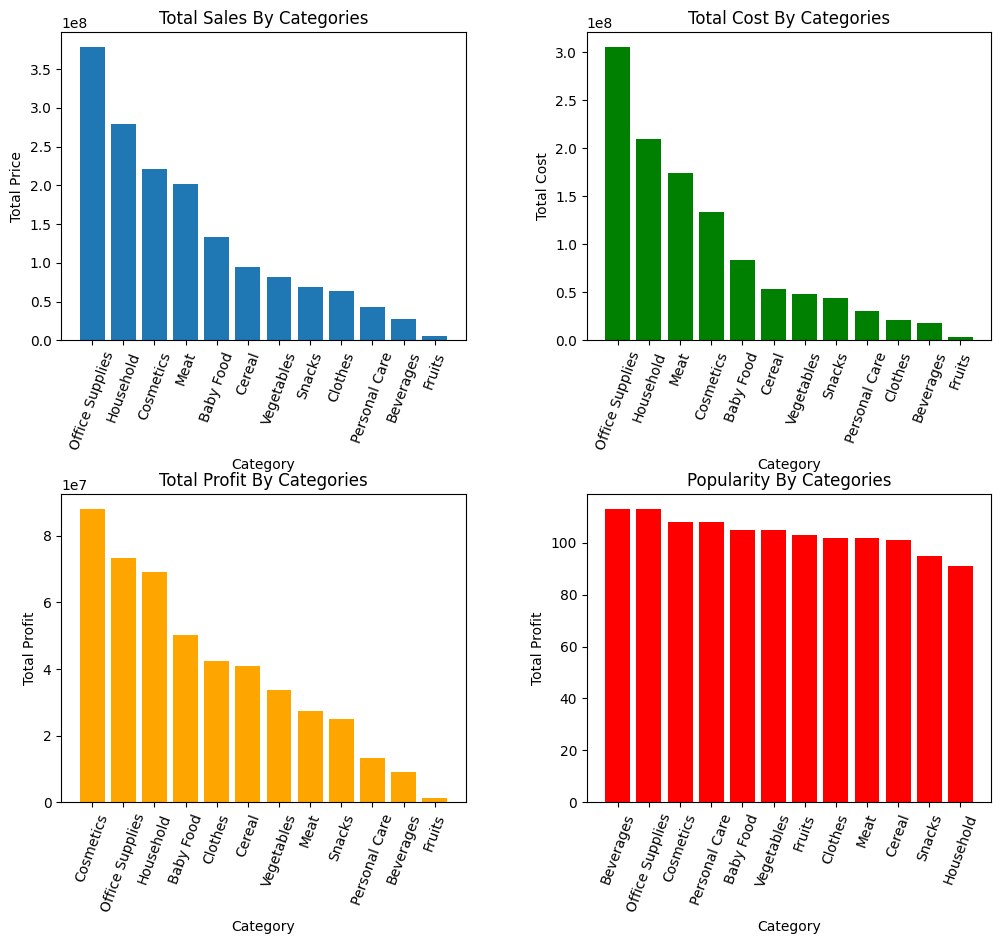

In [ ]:
# доходи, витрати, прибутки, популярність товарів в розрізі категорій
total_sales_by_categories = df.groupby("categories")["total_price"].sum().sort_values(ascending=False)
total_cost_by_categories = df.groupby("categories")["total_cost"].sum().sort_values(ascending=False)
total_profit_by_categories = df.groupby("categories")["total_profit"].sum().sort_values(ascending=False)
popularity_by_categories = df.groupby("categories")["order_id"].nunique().sort_values(ascending=False)
print(f"Загальні продажі за категоріями:\n{total_sales_by_categories}\n")
print(f"Загальні витрати за категоріями:\n{total_cost_by_categories}\n")
print(f"Загальгий дохід за категоріями:\n{total_profit_by_categories}\n")
print(f"Популярність категорій за кількістю замовлень:\n{popularity_by_categories}\n")

# Створюємо графіки
# Загальні продажі за категоріями
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # hspace для вертикальних відстаней, wspace для горизонтальних
ax[0, 0].bar(total_sales_by_categories.index, total_sales_by_categories.values)
ax[0, 0].set_title("Total Sales By Categories")
ax[0, 0].set_xlabel("Category")
ax[0, 0].set_ylabel("Total Price")
ax[0, 0].tick_params(axis='x', rotation=70) #Повертаємо підписи на 70 градусів.

# Загальні витрати за категоріями
ax[0, 1].bar(total_cost_by_categories.index, total_cost_by_categories.values, color = "green")
ax[0, 1].set_title("Total Cost By Categories")
ax[0, 1].set_xlabel("Category")
ax[0, 1].set_ylabel("Total Cost")
ax[0, 1].tick_params(axis='x', rotation=70) #Повертаємо підписи на 70 градусів.

# Загальгий дохід за категоріями
ax[1, 0].bar(total_profit_by_categories.index, total_profit_by_categories.values, color = "orange")
ax[1, 0].set_title("Total Profit By Categories")
ax[1, 0].set_xlabel("Category")
ax[1, 0].set_ylabel("Total Profit")
ax[1, 0].tick_params(axis='x', rotation=70) #Повертаємо підписи на 70 градусів.

# Популярність категорій за кількістю замовлень
ax[1, 1].bar(popularity_by_categories.index, popularity_by_categories.values, color = "red")
ax[1, 1].set_title("Popularity By Categories")
ax[1, 1].set_xlabel("Category")
ax[1, 1].set_ylabel("Total Profit")
ax[1, 1].tick_params(axis='x', rotation=70) #Повертаємо підписи на 70 градусів.



Проаналізуй інтервал часу між замовленням та його відвантаженням та зроби відповідні візуалізації в розрізі:

категорій товарів;  
країн;  
регіонів  

Середній час відвантаження за категоріями(дні):
categories
Cereal             27
Office Supplies    27
Baby Food          26
Cosmetics          25
Snacks             25
Meat               25
Vegetables         24
Fruits             24
Clothes            23
Beverages          23
Household          23
Personal Care      20
Name: time_interval, dtype: int64

Середній час відвантаження за країнами(дні):
name
Hungary                   32
Georgia                   29
Slovakia                  28
Austria                   28
Luxembourg                27
Russia                    27
Lithuania                 27
Poland                    27
Bulgaria                  26
Albania                   26
Andorra                   26
Armenia                   26
Belgium                   26
Netherlands               26
Monaco                    26
Montenegro                26
Spain                     26
Finland                   26
France                    26
Bosnia and Herzegovina    26
Belarus     

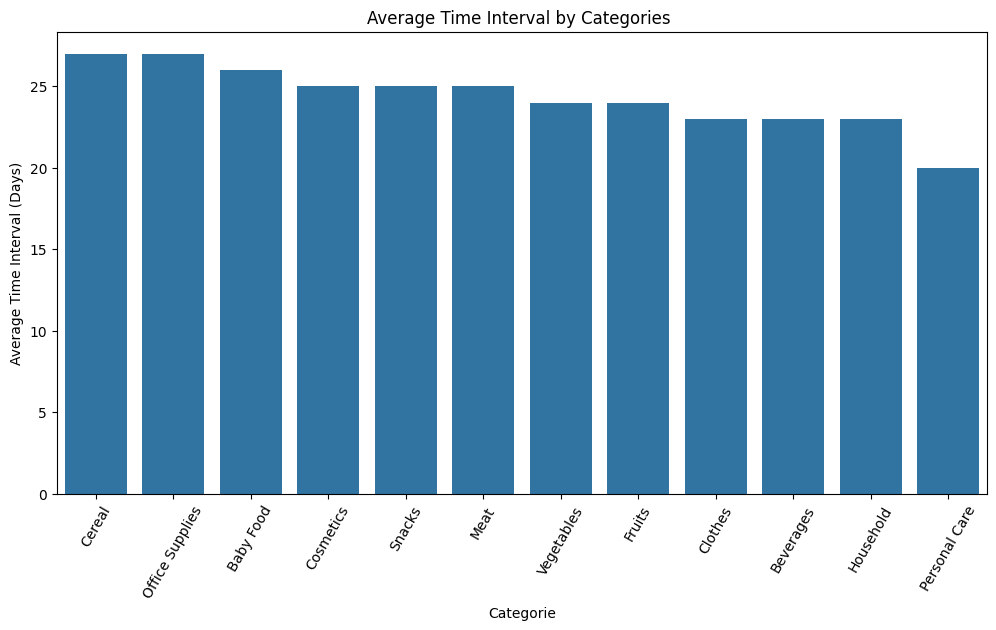

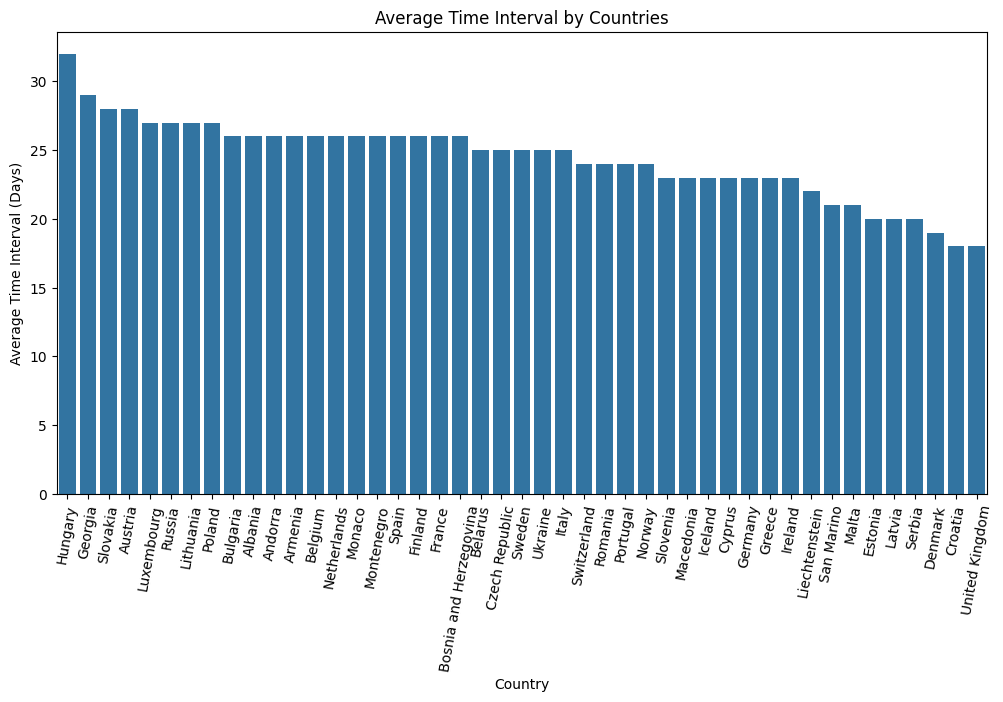

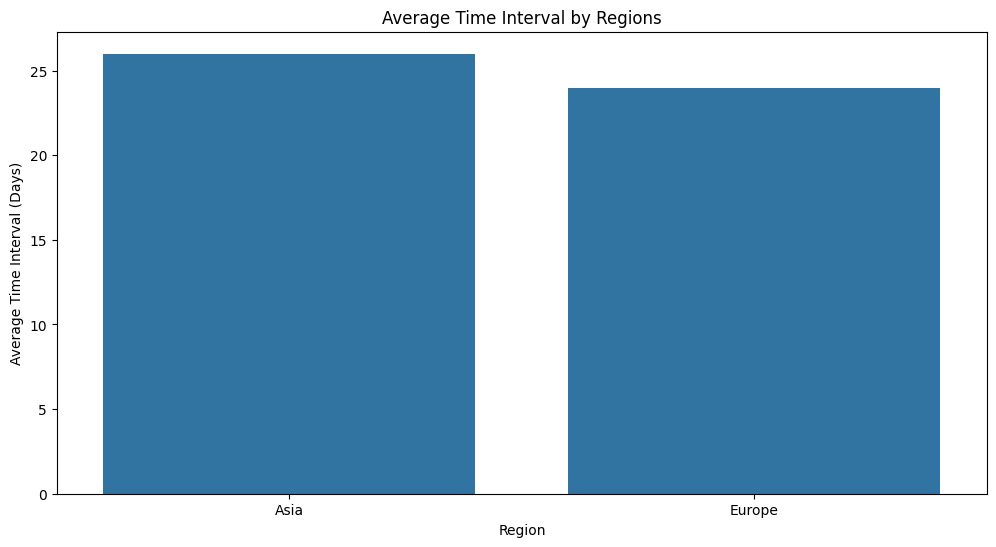

In [ ]:
# Аналізуємо інтервал часу між замовленням та його відвантаженням
# За категоріями товарів

interval_by_categories = df.groupby("categories")["time_interval"].mean().dt.days.sort_values(ascending=False)
print(f"Середній час відвантаження за категоріями(дні):\n{interval_by_categories}\n")

# За країнами
interval_by_countries = df.groupby("name")["time_interval"].mean().dt.days.sort_values(ascending=False)
print(f"Середній час відвантаження за країнами(дні):\n{interval_by_countries}\n")

# За регіонами
interval_by_regions = df.groupby("region")["time_interval"].mean().dt.days
print(f"Середній час відвантаження за регіонами(дні):\n{interval_by_regions}\n")

# Побудуємо бар чарти
plt.figure(figsize=(12, 6))
sns.barplot(x=interval_by_categories.index, y=interval_by_categories.values)
plt.title("Average Time Interval by Categories ")
plt.xlabel("Categorie")
plt.ylabel("Average Time Interval (Days)")
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=interval_by_countries.index, y=interval_by_countries.values)
plt.title("Average Time Interval by Countries")
plt.xlabel("Country")
plt.ylabel("Average Time Interval (Days)")
plt.xticks(rotation=80)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=interval_by_regions.index, y=interval_by_regions.values)
plt.title("Average Time Interval by Regions")
plt.xlabel("Region")
plt.ylabel("Average Time Interval (Days)")
plt.show()

#

Проаналізуй, чи залежить прибуток від часу, необхідного на відвантаження товару.  
Зроби потрібні для цього агрегування та візуалізації.

   time_interval          sum           mean
0         0 days   6419878.24  337888.328421
1         1 days   6429428.34  338390.965263
2         2 days   8664755.51  346590.220400
3         3 days   8847142.49  285391.693226
4         4 days   7527863.59  278809.762593
5         5 days  11276412.01  417644.889259
6         6 days   9517301.39  366050.053462
7         7 days  11953246.37  398441.545667
8         8 days   8164725.51  354988.065652
9         9 days  11585602.57  445600.098846
10       10 days   3397577.40  212348.587500
11       11 days  10739042.85  413040.109615
12       12 days   9589547.08  368828.733846
13       13 days   6108834.05  321517.581579
14       14 days   7371059.48  307127.478333
15       15 days   8239716.51  294275.589643
16       16 days  12843610.64  428120.354667
17       17 days  11476296.16  441396.006154
18       18 days   3195894.01  213059.600667
19       19 days  12598710.40  449953.942857
20       20 days   5725553.51  248937.109130
21       2

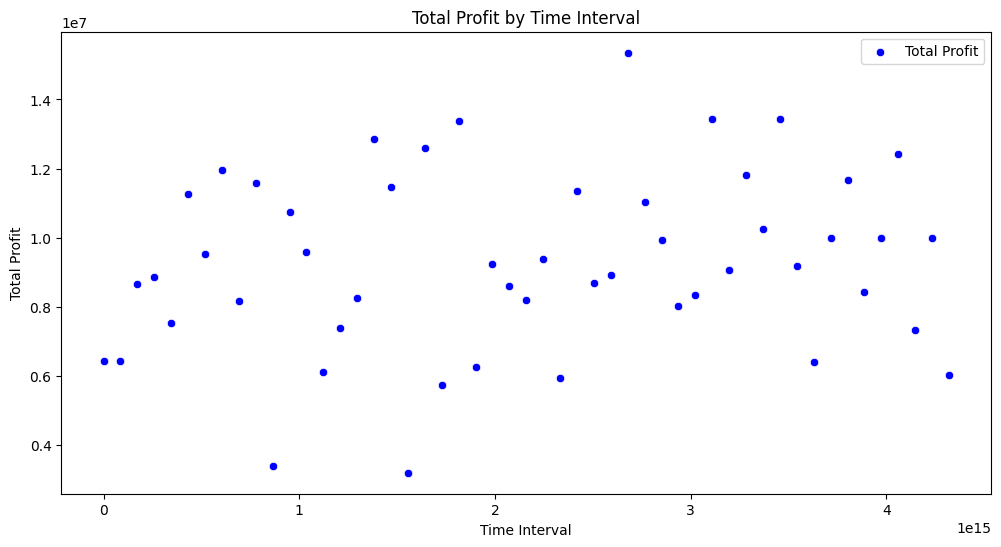

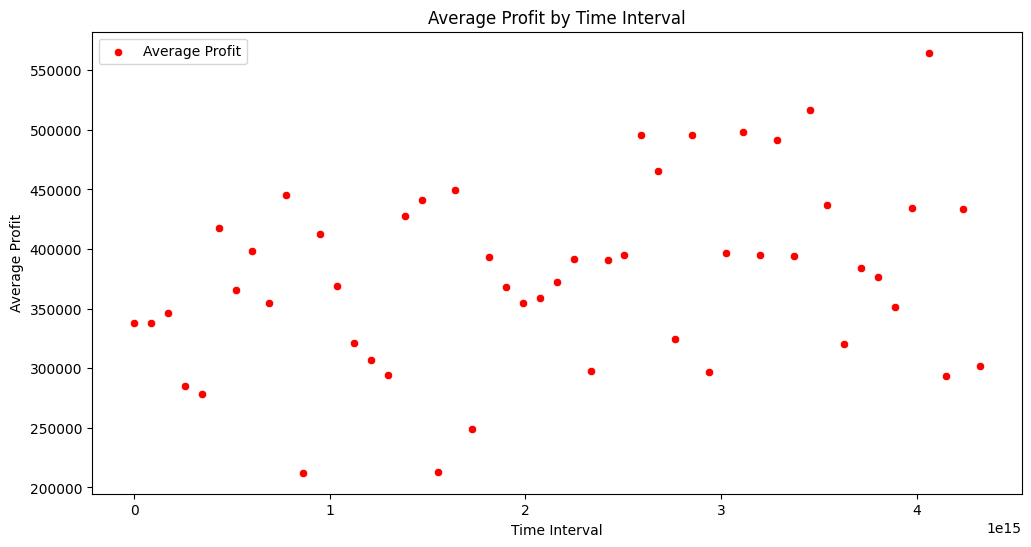

In [ ]:
# Для аналізу залежності прибутку від інтервалу згрупуємо інтервали за прибутком та відобразимо на Scatter Plot

group_intervals = df.groupby('time_interval')["total_profit"].agg(['sum','mean']).reset_index()
print(group_intervals)
# Будуємо графіки
plt.figure(figsize=(12, 6))
sns.scatterplot(x=group_intervals["time_interval"], y=group_intervals["sum"], label="Total Profit", color="blue")
plt.title("Total Profit by Time Interval")
plt.xlabel("Time Interval")
plt.ylabel("Total Profit")
plt.show()
plt.figure(figsize=(12, 6))
sns.scatterplot(x=group_intervals["time_interval"], y=group_intervals["mean"], label="Average Profit", color="red")
plt.title("Average Profit by Time Interval")
plt.xlabel("Time Interval")
plt.ylabel("Average Profit")
plt.show()


З дослідження виходить, що немає очевидної залежності між часом на відвантаження та прибутком.

Проаналізуй за допомогою візуалізації динаміку продажів (у часі) у розрізі категорій товарів, країн, регіонів, визнач основні тенденції.

         categories   total_price
0   Office Supplies  3.786662e+08
1         Household  2.788744e+08
2         Cosmetics  2.213054e+08
3              Meat  2.013398e+08
4         Baby Food  1.338344e+08
5            Cereal  9.467672e+07
6        Vegetables  8.203849e+07
7            Snacks  6.921349e+07
8           Clothes  6.330732e+07
9     Personal Care  4.334632e+07
10        Beverages  2.742567e+07
11           Fruits  4.955490e+06


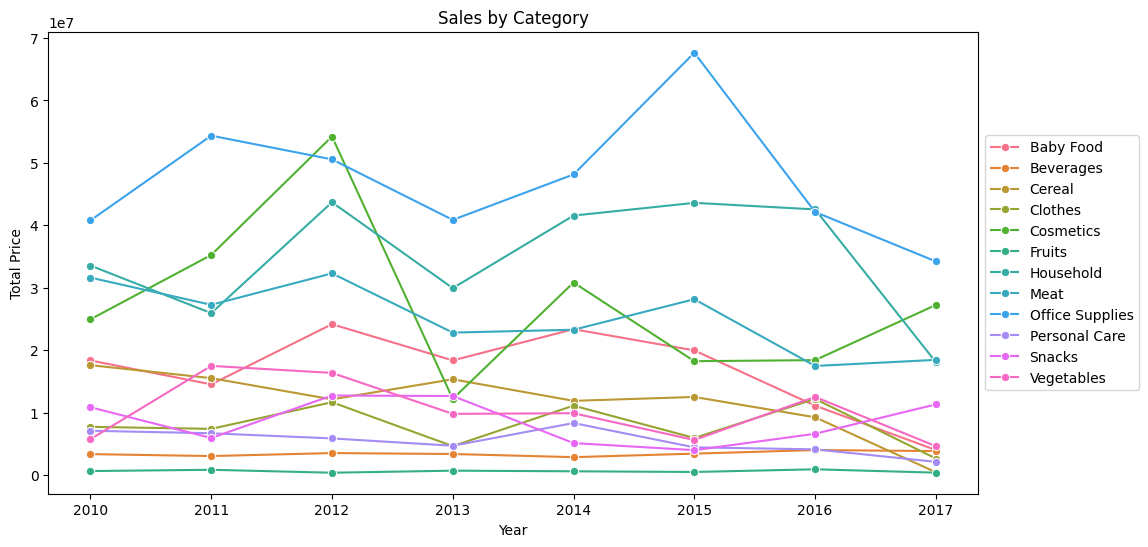

   index                    name  total_price
0     10          Czech Republic  53543932.14
1     43                 Ukraine  53252317.54
2      6  Bosnia and Herzegovina  50117508.49
3     26               Macedonia  49222085.25
4     36              San Marino  47883708.48
5      1                 Andorra  47756693.17
6     33                Portugal  47172189.84
7     27                   Malta  47145320.81
8     35                  Russia  46051659.81
9     38                Slovakia  42940998.32


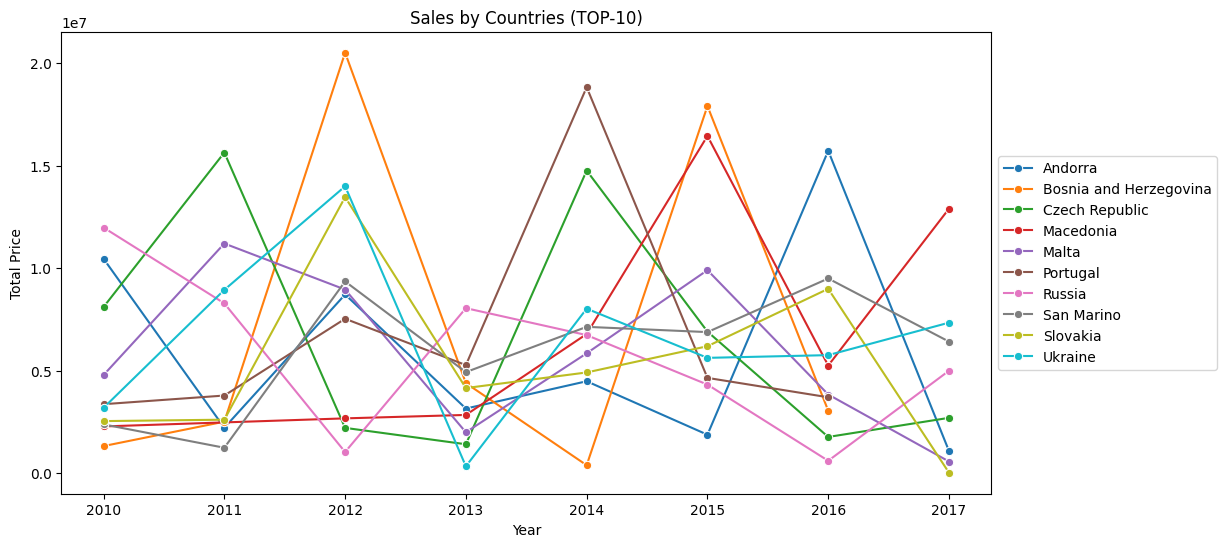

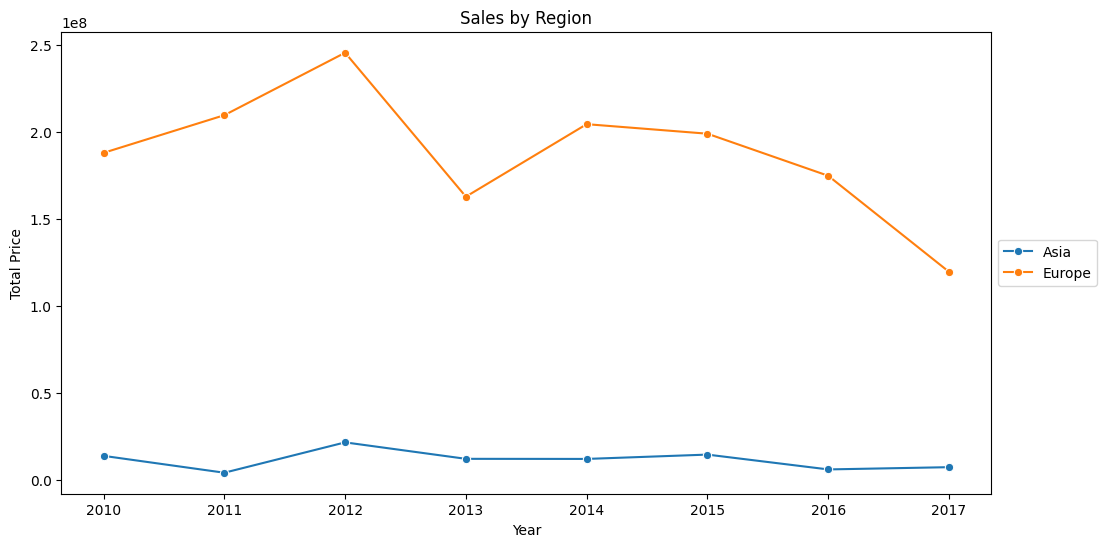

In [ ]:
# Будуємо лінійні графіки для відображення динаміки продажів(у часі) у розрізі категорій, країн, регіонів.
sales_by_category = df.groupby(["year", "categories"])["total_price"].sum().reset_index()
print(df.groupby(["categories"])["total_price"].sum().sort_values(ascending=False).reset_index())
plt.figure(figsize=(12, 6))
sns.lineplot(x="year", y="total_price", hue="categories", data=sales_by_category, marker="o")
plt.title("Sales by Category")
plt.xlabel("Year")
plt.ylabel("Total Price")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5)) # Пересуваємо легенду вправо
plt.show()

#При візуалізації продажів по всіх країнах, графік виявився дуже захаращений, тому проаналізуємо ТОП-10 країн по продажах.
sales_by_country = df.groupby(["year", "name"])["total_price"].sum().reset_index()
# Визначаємо топ-10 країн за загальними продажами
top_10_countries = sales_by_country.groupby("name")["total_price"].sum().nlargest(10).index
# Фільтруємо дані, залишаючи лише топ-10 країн
sales_by_top_countries = sales_by_country[sales_by_country["name"].isin(top_10_countries)]
print(df.groupby(["name"])["total_price"].sum().reset_index().sort_values(by="total_price", ascending=False).reset_index().head(10))

plt.figure(figsize=(12, 6))
sns.lineplot(x="year", y="total_price", hue="name", data=sales_by_top_countries, marker="o")
plt.title("Sales by Countries (TOP-10)")
plt.xlabel("Year")
plt.ylabel("Total Price")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

sales_by_region = df.groupby(["year", "region"])["total_price"].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x="year", y="total_price", hue="region", data=sales_by_region, marker="o")
plt.title("Sales by Region")
plt.xlabel("Year")
plt.ylabel("Total Price")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


В результаті аналізу продажів (у часі) в розрізі категрій можна виділити:
- 2012 рік - категорії Office Supplies, Cosmetics.
- 2015 рік - категрії Office Supplies, Household.

Для більш чительної побудови графіку для аналізу продажів в розрізі країн довелося виділити ТОП-10 країн по продажах та в їх розрізі будувати візуалізацію, і що ми отримали - найрезультативнішими були роки 2012, 2014, 2015, а найгіршим - 2013, лідерами серед продажів були такі країни:
- 2012 - Bosnia and Herzegovina, Ukraine, Slovakia;
- 2014 - Portugal, Czech Republic
- 2015 - Bosnia and Herzegovina, Macedonia  

В розрізі регіонів найвищі продажі були в 2012 році в обох регіонах.


Проведи аналіз продажів товарів за днями тижня. Чи можна деякі товари вважати сезонними?

<ipython-input-35-752e4acf8935>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_day_of_week = df.groupby(["day_of_week", "categories"])["total_price"].sum().reset_index()


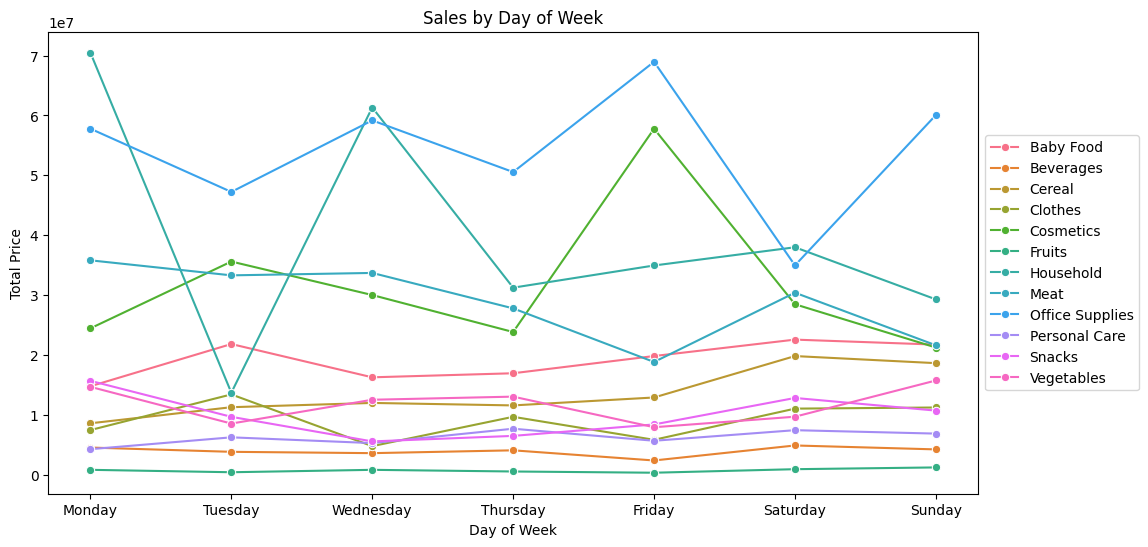

In [ ]:
# Створюємо категорійну змінну для правильного сортування днів з понеділка по неділю
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Додаємо до датасету стовбчик по днях
df["day_of_week"] = pd.Categorical(df["order_date"].dt.day_name(), categories=day_order, ordered=True)

# Групуємо за днями тижня та категоріями
sales_by_day_of_week = df.groupby(["day_of_week", "categories"])["total_price"].sum().reset_index()

# Побудуємо лінійний графік
plt.figure(figsize=(12, 6))
sns.lineplot(x="day_of_week", y="total_price", hue="categories", data=sales_by_day_of_week, marker="o")

plt.title("Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Price")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()


Як ми бачимо з аналізу продажів по днях тижня, продажі мають яскраво виражену сезонність, стрибок продажів відбувається в понеділок, середу та п'ятницю, а у вівторок та суботу - загальний спад.   
Щодо сезонності товарів, то вірдазу кидається в очі Household - різкий зріст продажів в понеділок та середу, також Cosmetics - п'ятниця.

# Reporting.
Висновки.

Ключові метрики компанії:   
Кількість замовлень за весь період: 1246  
Загальний прибуток: 2031698170288.82  
Загальний дохід: 598991837488.55  
Кількість країн: 45  

В розрізі категорій до трійки лідерів як за обсягом продажів так і за доходом компанії входять - Office Supplies, Household, Cosmetics. найгіршими є Personal Care, Beverages, Fruits.      

В результаті аналізу часу відвантаження було виявлено велику різницю між інтервалами в розрізі як країн так і категорій, середні інтервали коливаються в межаж значень 18 - 32 дні.

З дослідження впливу інтервалу на прибуток виходить, очевидної залежності між часом на відвантаження та прибутком не виявлено.

В результаті аналізу продажів (у часі) в розрізі категрій можна виділити:

2012 рік - категорії Office Supplies, Cosmetics.
2015 рік - категрії Office Supplies, Household.
Для більш чительної побудови графіку для аналізу продажів в розрізі країн довелося виділити ТОП-10 країн по продажах та в їх розрізі будувати візуалізацію, і що ми отримали - найрезультативнішими були роки 2012, 2014, 2015, а найгіршим - 2013, лідерами серед продажів були такі країни:

2012 - Bosnia and Herzegovina, Ukraine, Slovakia;
2014 - Portugal, Czech Republic
2015 - Bosnia and Herzegovina, Macedonia
В розрізі регіонів найвищі продажі були в 2012 році в обох регіонах.

Станом на 2017 рік (останній рік аналітики) відбулося різке падіння продажів по всіх категоріях.

Аналіз продажів по днях тижня, показав, що продажі мають яскраво виражену сезонність, стрибок продажів відбувається в понеділок, середу та п'ятницю, а у вівторок та суботу - загальний спад.
Щодо сезонності товарів, то відразу кидається в очі Household - різкий зріст продажів в понеділок та середу, також Cosmetics - п'ятниця.

Рекомендації.

На підставі вищевказаних висновків пропоную наступне:
- Звернути увагу на категорії-лідери, забезпечити товарні запаси та розглянути можливість розширення асортименту, запустити додаткові маркетингові задачі для утримання високого рівня продажів. Також треба звернути увагу на категорії, які приносять найменші продажі, перевірити їх на предмет доцільності в портфелі, та при можливості замінити на більш актуальні категорії продуктів.
- Провести комплекс заходів щодо оптимізації логістики, що потенційно може зменшити час та вартість доставки, тим самим збільшить частоту повторних замовлень.
- Як ми бачимо останній рік різко впали продажі по всіх категоріях та регіонах, тому треба провести перегляд цінової політики портфелю, привести її до відповідності згідно з країнами, провести детальне дослідження ринку на предмет пошуку нових актуальних категорій продуктів, а також при можливості працювати над розробкою власних торгових марок, які могли б замінити дорожчі позиції портфелю.
- Впровадити акційну активність в так звані "слабі дні тижня" для потенційного збільшення зацікавленості до продуктів, які показують спад в певні дні тижня, цим самим підвищити продажі, як в слабі так і в сильні дні.



